In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import copy
import matplotlib.pyplot as plt
import umap

c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\PBMC_Hao\GSE164378_Hao\Hao_PBMC_GSE164378_raw.h5ad")
# adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/PBMC_Hao/GSE164378_Hao/Hao_PBMC_GSE164378_raw.h5ad')
adata.shape

(161764, 33538)

## Normalization

In [ ]:
# Normalization
# each observation (cell) has a total count equal to the median of total counts for observations (cells)
sc.pp.normalize_total(adata, target_sum=None)  # see PreLect performance to see if target_sum is needed
# log1p transformation
sc.pp.log1p(adata)

## Calculate Jaccard distance before PCA

In [3]:
X_sparse = adata.X

In [4]:
X_binary = (adata.X > 0).astype(int)
type(X_binary)

scipy.sparse._csc.csc_matrix

In [5]:
fit_j = umap.UMAP(n_neighbors=15, n_components=2, metric='jaccard', min_dist=0.5)
u_j = fit_j.fit_transform(X_binary)

c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

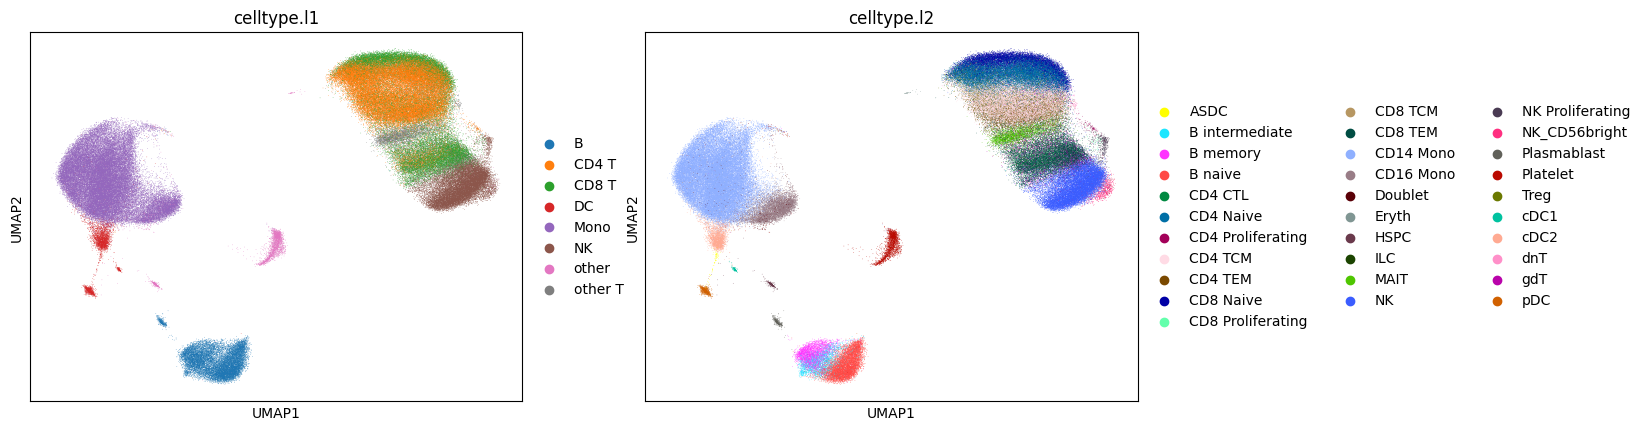

In [6]:
adata.obsm['X_umap'] = u_j
sc.pl.umap(adata, color=['celltype.l1', 'celltype.l2'])